In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Load dataset
data_path = r"C:\Users\LOKESH\Downloads\ASD-Predicting-ML-Project\data_csv.csv"
df = pd.read_csv(data_path)

In [3]:
# Drop identifier column
df.drop(columns=["CASE_NO_PATIENT'S"], inplace=True)

In [4]:
# Handle missing values
df.fillna(df.median(numeric_only=True), inplace=True)

def fill_mode(col):
    return df[col].mode()[0] if col in df.columns else None

for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(fill_mode(col), inplace=True)

C:\Users\LOKESH\AppData\Local\Temp\ipykernel_3460\4031731199.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(fill_mode(col), inplace=True)


In [5]:
# Encode categorical features
le = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = le.fit_transform(df[column])

In [6]:
# Define features and target
X = df.drop(columns=['ASD_traits'])  # Target variable
y = df['ASD_traits']

In [7]:
# Feature selection
selector = SelectKBest(score_func=chi2, k=10)  # Selecting top 10 features
X_new = selector.fit_transform(X, y)

In [8]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

In [9]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9974811083123426
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       196
           1       1.00      1.00      1.00       201

    accuracy                           1.00       397
   macro avg       1.00      1.00      1.00       397
weighted avg       1.00      1.00      1.00       397



In [11]:
# Train SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.7858942065491183
              precision    recall  f1-score   support

           0       0.71      0.95      0.81       196
           1       0.93      0.63      0.75       201

    accuracy                           0.79       397
   macro avg       0.82      0.79      0.78       397
weighted avg       0.82      0.79      0.78       397



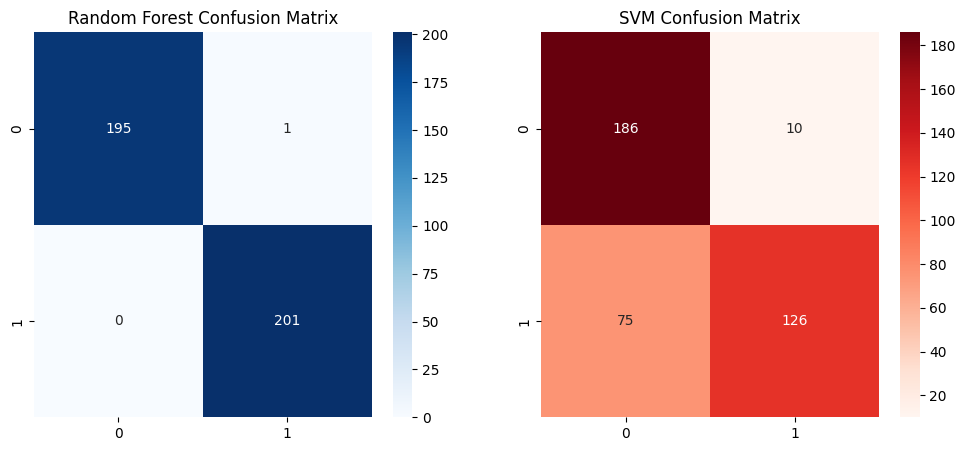

In [12]:
# Confusion matrices
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Reds')
plt.title('SVM Confusion Matrix')

plt.show()